## Продвинутые идеи

В этом ноутбуке даны наброски двух идей:

1) Преобразование Фурье

2) Приведение данных к неподвижной системе координат и интегрирование для получения скорости/координаты тела

Нахождение матрицы поворота, переводящей вектор vec1 в вектор vec2.

In [1]:
def rotation_matrix_from_vectors(vec1, vec2):
    """ Find the rotation matrix that aligns vec1 to vec2
    :param vec1: A 3d "source" vector
    :param vec2: A 3d "destination" vector
    :return mat: A transform matrix (3x3) which when applied to vec1, aligns it with vec2.
    """
    a, b = (vec1 / numpy.linalg.norm(vec1)).reshape(3), (vec2 / numpy.linalg.norm(vec2)).reshape(3)
    v = numpy.cross(a, b)
    if any(v): #if not all zeros then 
        c = numpy.dot(a, b)
        s = numpy.linalg.norm(v)
        kmat = numpy.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
        return numpy.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))

    else:
        return numpy.eye(3) #cross of all zeros only occurs on identical directions

Поворот данных, записанных в списках X, Y, Z (исходные ускорения) на матрицу Mat.

In [2]:
def rotate(X, Y, Z, Mat):
    new_x = []
    new_y = []
    new_z = []
    
    for elem in zip(X,Y,Z):
        res = Mat.dot(elem)
        new_x.append(res[0])
        new_y.append(res[1])
        new_z.append(res[2])
        
    return new_x, new_y, new_z

Интеграл - это площадь под графиком. Для вычисления интеграла в случае, если измерения проводились через одинаковый промежуток времени dt, можно посчитать сумму всех измерений, умноженных на dt.  

In [4]:
def integrate(lst, dt):
    res = []
    s = 0
    for elem in lst:
        s += elem * dt
        res.append(s)
    return res

In [6]:
import os
import pandas as pd
path = r'C:\Users\elena\Desktop\ВШЭ\MiniCourse\tracks' 
data = {}

Data = []
Target = []

i=0
for dir_entry in os.listdir(path):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            df = pd.read_csv(my_file, delimiter=';')
            if df.shape[1] != 5:
                pass
            else:
                Data.append(df)
                Target.append(dir_entry_path.split("\\")[-1])

for dir_entry in os.listdir(path):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            df = pd.read_csv(my_file, delimiter=',')
            if df.shape[1] == 5:
                Data.append(df)
                Target.append(dir_entry_path.split("\\")[-1])

Нарисуем 9 графиков:

первый ряд:

1) исходные данные

2) норма ускорения

3) FFT от нормы ускорения


второй ряд:

4) FFT от ax (старая ось, но можно и от новой)

5) FFT от ay (старая ось, но можно и от новой)

6) FFT от az (старая ось, но можно и от новой)


третий ряд:

7) перемещение вдоль оси x

8) перемещение вдоль оси y

9) перемещение вдоль оси z

Populating the interactive namespace from numpy and matplotlib
2021-06-1809.37.50мама_ходьба.csv
2021-06-1809.37.50мама_ходьба.csv
New means: 2.0171546792337834e-17 -7.060041377318242e-17 0.9207806662206289


C:\Users\elena\AppData\Roaming\Python\Python37\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


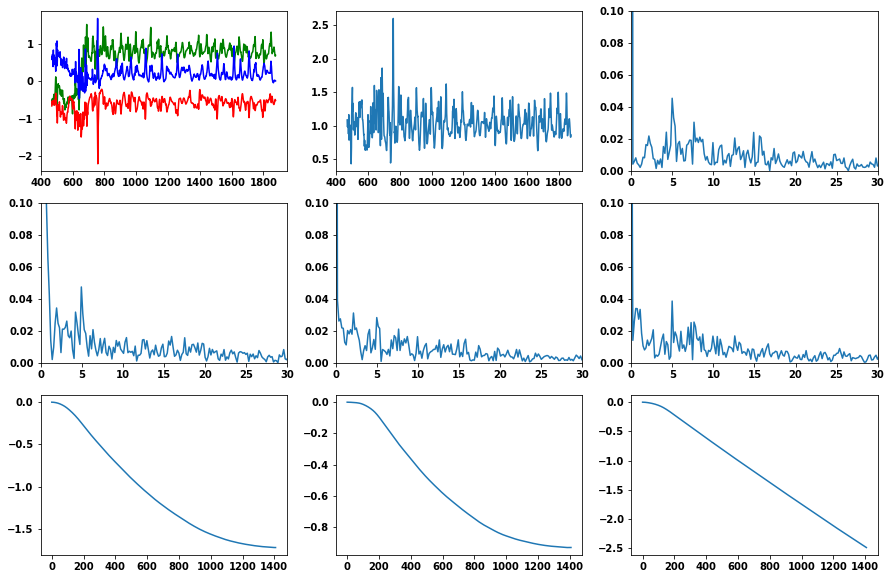

2021-06-1809.37.50мама_ходьба.csv Амплитуда: 2.168517985868252
2021-06-1810.34.02игорь_ходьба.csv
2021-06-1810.34.02игорь_ходьба.csv
New means: 5.782058677734515e-18 -2.6019264049805316e-17 0.9881361742749976


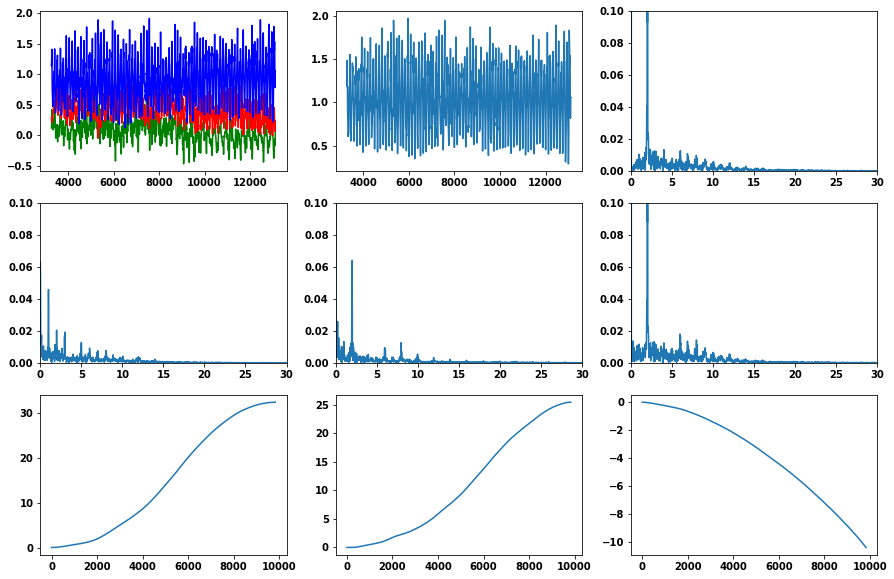

2021-06-1810.34.02игорь_ходьба.csv Амплитуда: 1.6839385665750368
2021-06-1810.45.31игорь_велик.csv
2021-06-1810.45.31игорь_велик.csv
New means: 6.101698031430658e-17 1.0372886653432119e-16 0.9595584300866221


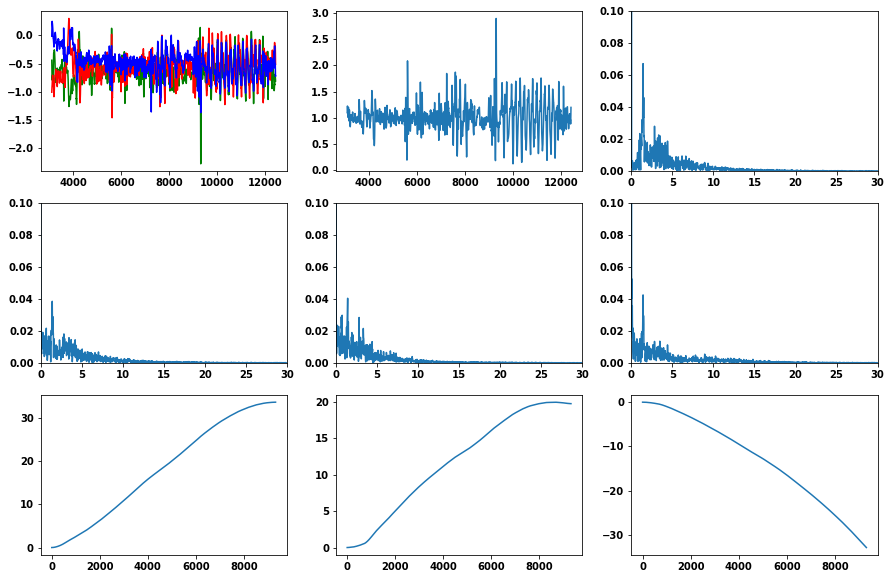

2021-06-1810.45.31игорь_велик.csv Амплитуда: 2.76747032033991
2021-06-1810.47.54игорь_велик.csv
2021-06-1810.47.54игорь_велик.csv
New means: -1.6347737552409865e-16 -1.1676955394578474e-17 0.8337899950617419


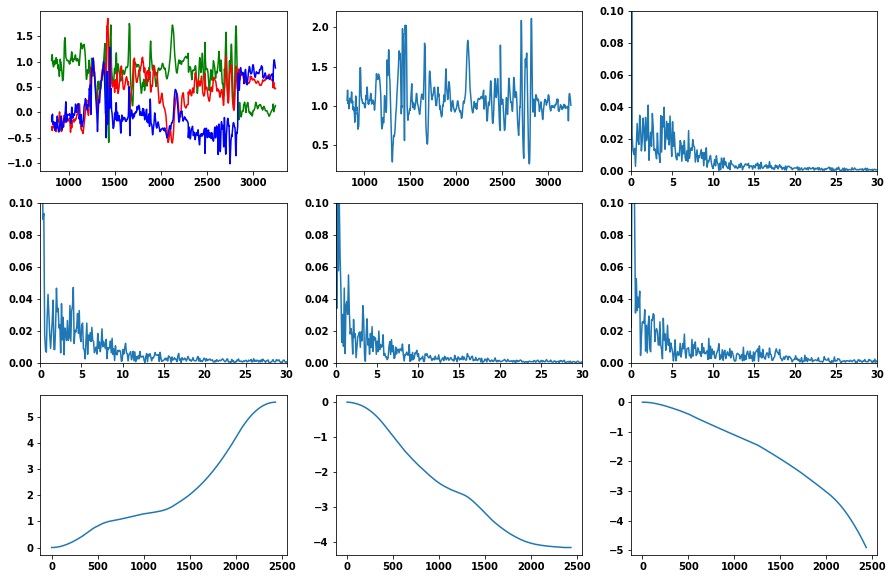

2021-06-1810.47.54игорь_велик.csv Амплитуда: 1.8580239992320757
2021-06-1811.02.03игорь_велик.csv
2021-06-1811.02.03игорь_велик.csv
New means: 5.019286433625432e-17 2.509643216812716e-17 0.778234391650509


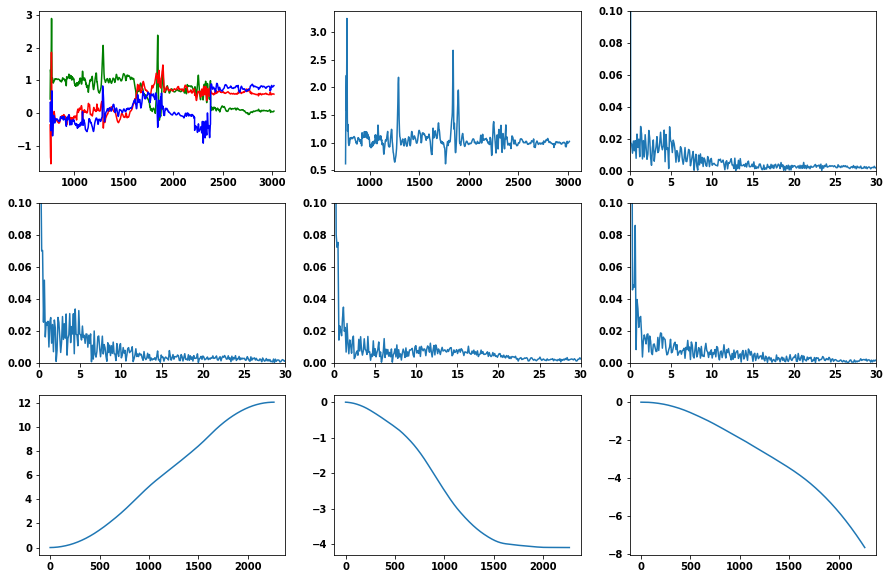

2021-06-1811.02.03игорь_велик.csv Амплитуда: 2.6278376772731593
2021-06-1811.12.05игорь_ходьба.csv
2021-06-1811.12.05игорь_ходьба.csv
New means: -4.991519042923078e-18 7.986430468676925e-17 0.9866666696868918


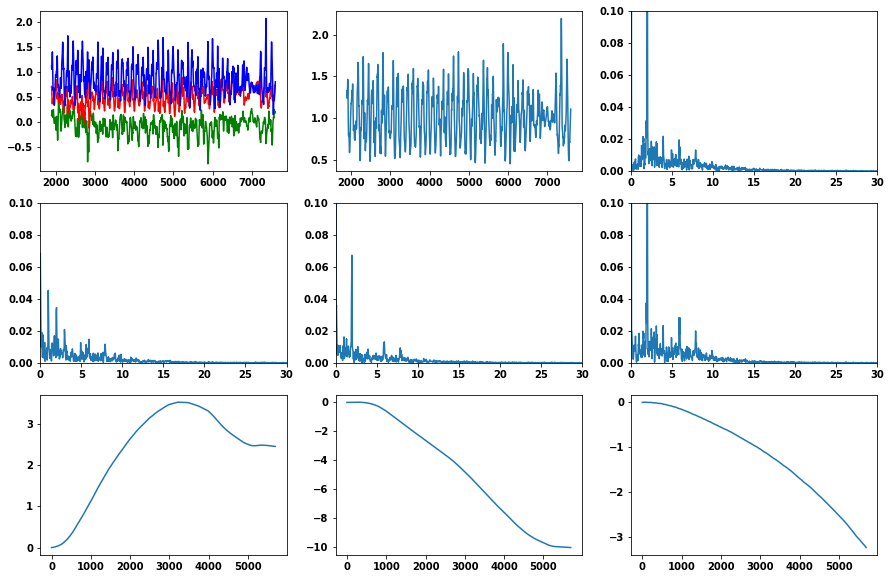

2021-06-1811.12.05игорь_ходьба.csv Амплитуда: 1.7435676109154818
2021-06-1816.20.43игорь_ходьба.csv
2021-06-1816.20.43игорь_ходьба.csv
New means: -3.987332972840069e-18 -3.72151077465073e-17 1.0077687748981166


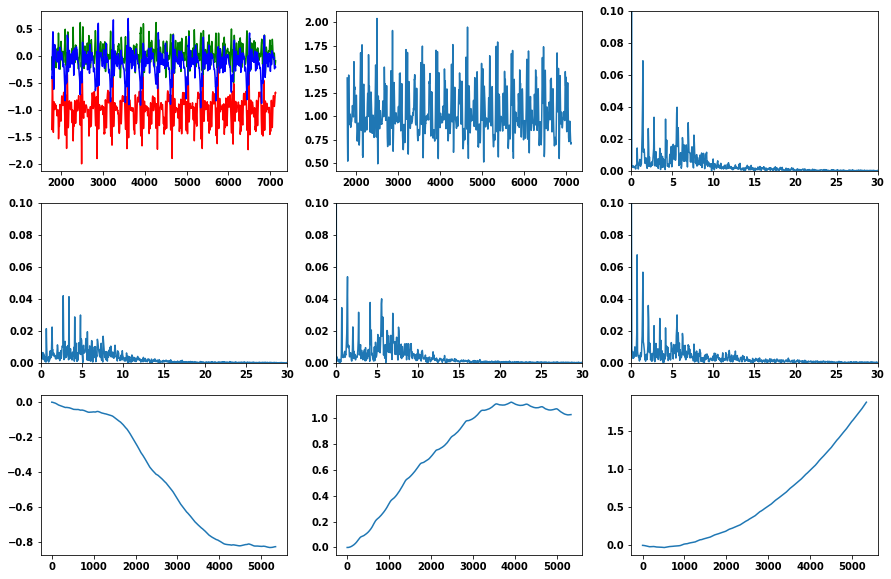

2021-06-1816.20.43игорь_ходьба.csv Амплитуда: 1.5475739366349013
2021-06-1816.25.37 автобус.csv
2021-06-1816.25.37 автобус.csv
New means: 5.3091114525895126e-17 -1.9160702986789218e-17 0.9962121019221851


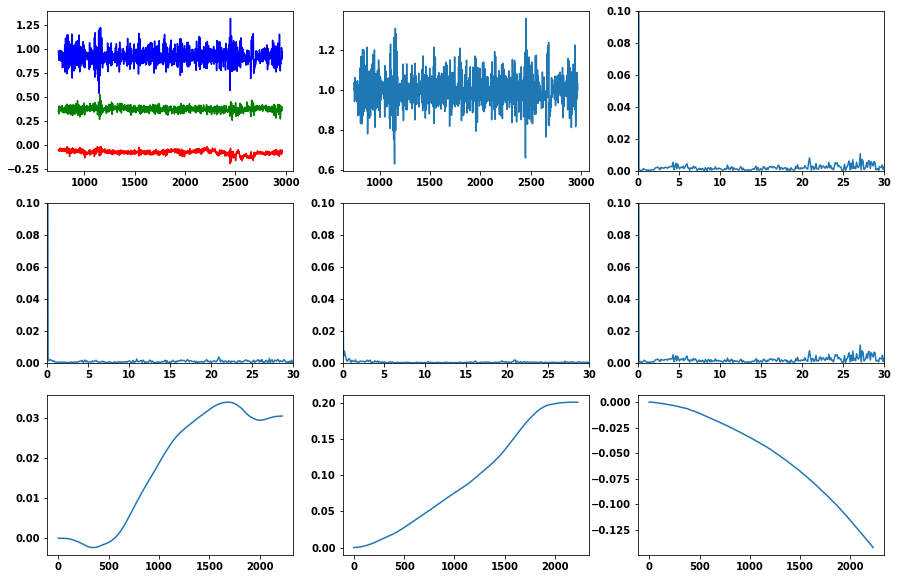

2021-06-1816.25.37 автобус.csv Амплитуда: 0.727376644130541
2021-06-1816.59.10игорь_ходьба.csv
2021-06-1816.59.10игорь_ходьба.csv
New means: -1.445477911272931e-16 9.03423694545582e-18 1.0401469333103404


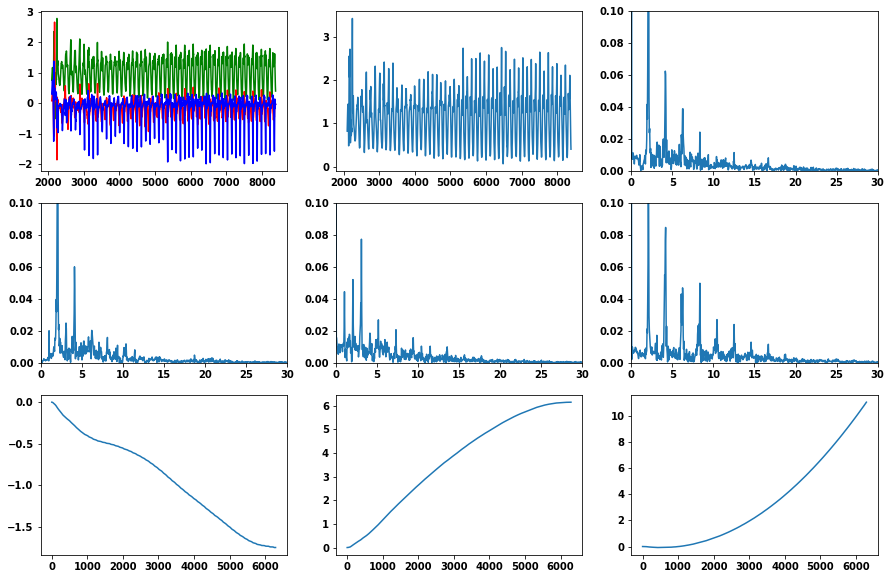

2021-06-1816.59.10игорь_ходьба.csv Амплитуда: 3.351567310792711
2021-06-1817.12.30игорь_велик.csv
2021-06-1817.12.30игорь_велик.csv
New means: 1.948026691597259e-17 -1.948026691597259e-17 0.6291453052207212


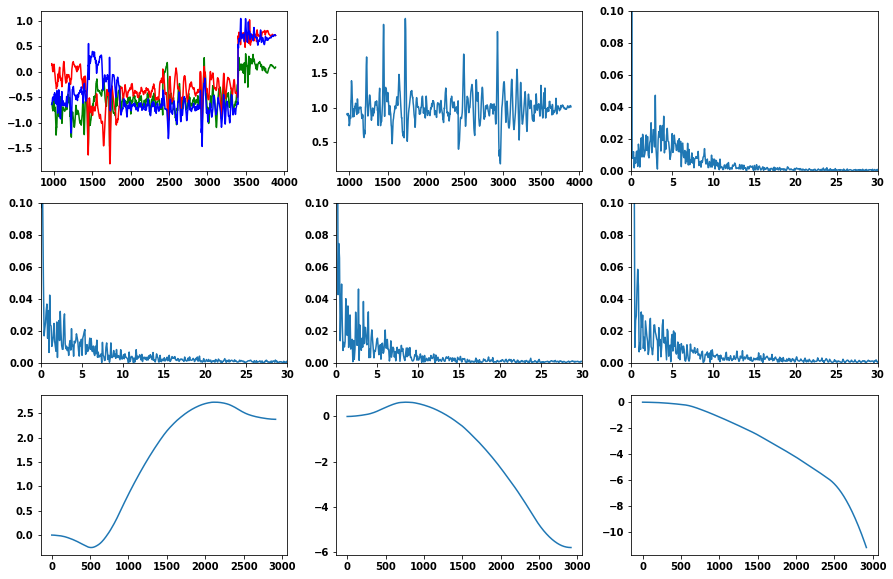

2021-06-1817.12.30игорь_велик.csv Амплитуда: 2.124336238883378
2021-06-2020.13.16бег
2021-06-2020.13.16бег
New means: 1.814923973844445e-17 9.528350862683336e-17 1.0888096186461738


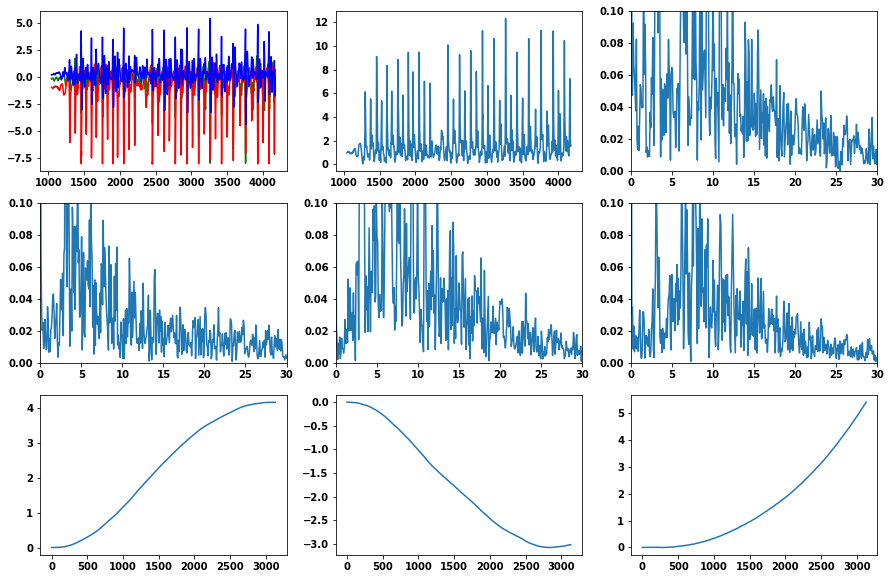

2021-06-2020.13.16бег Амплитуда: 12.264154426789304
2021-06-2020.13.56бег
2021-06-2020.13.56бег
New means: -2.7343590710943932e-17 7.812454488841123e-17 1.0874761374348487


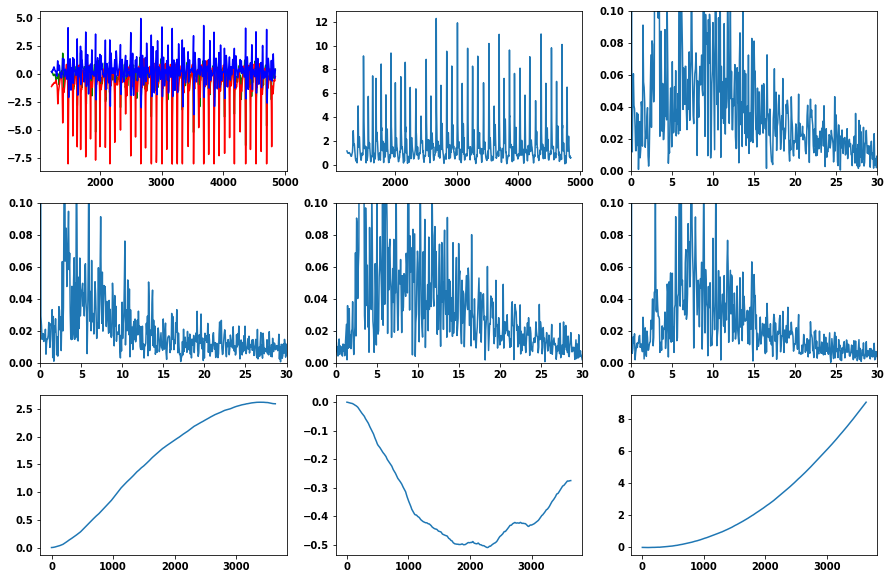

2021-06-2020.13.56бег Амплитуда: 12.191495047372761
2021-06-2020.14.42стояние
2021-06-2020.14.42стояние
New means: 1.0145972352069056e-17 1.1556262509006656e-16 1.007960618266647


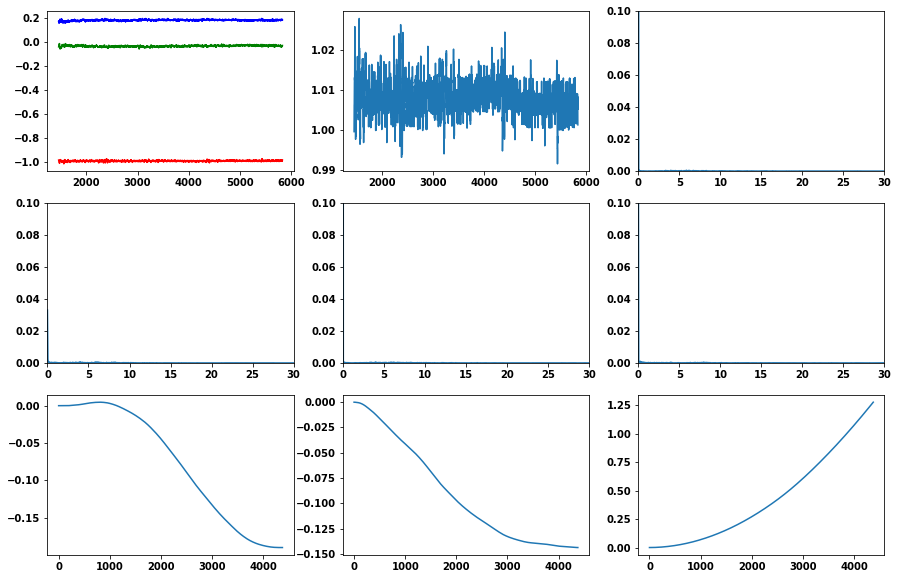

2021-06-2020.14.42стояние Амплитуда: 0.03637271909921902
2021-06-2020.15.24ходьба
2021-06-2020.15.24ходьба
New means: 1.1410413283598764e-17 5.4606977857222654e-17 1.0210588855971006


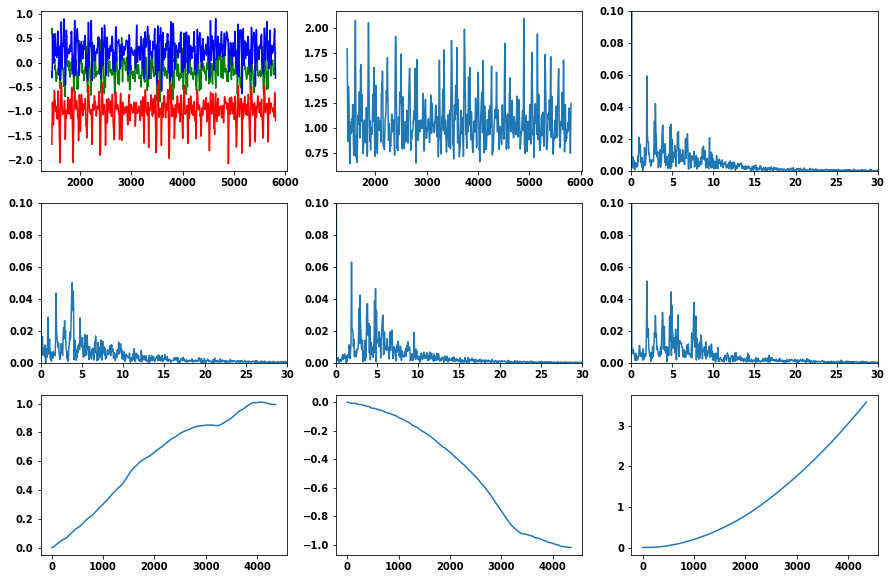

2021-06-2020.15.24ходьба Амплитуда: 1.4492116428792845
2021-06-2109.58.20э0 ходьба
2021-06-2109.58.20э0 ходьба
New means: 1.842666689872079e-16 -5.753079984598077e-17 1.0157404825825196


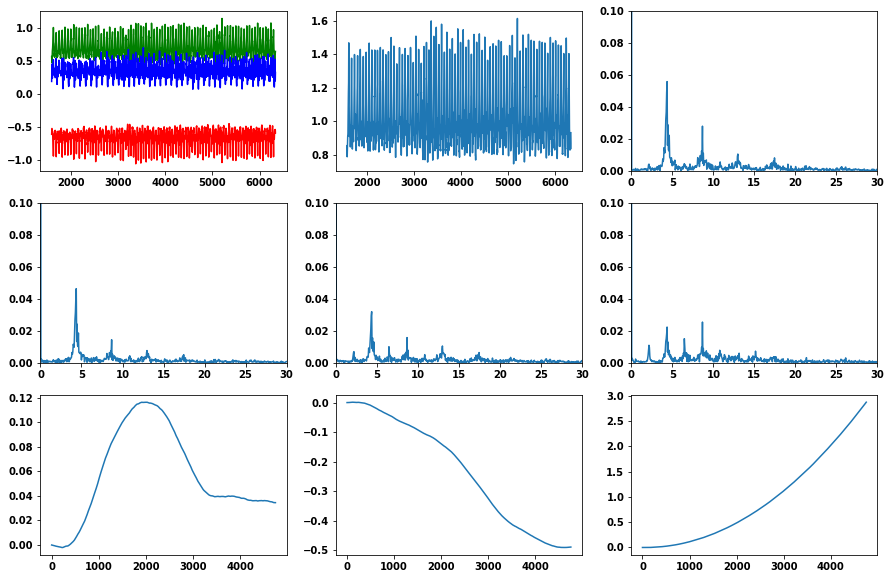

2021-06-2109.58.20э0 ходьба Амплитуда: 0.8666998610610978
2021-06-2112.12.41бег
2021-06-2112.12.41бег
New means: -1.9209965820486168e-17 1.372947557170041e-16 1.1825299424000284


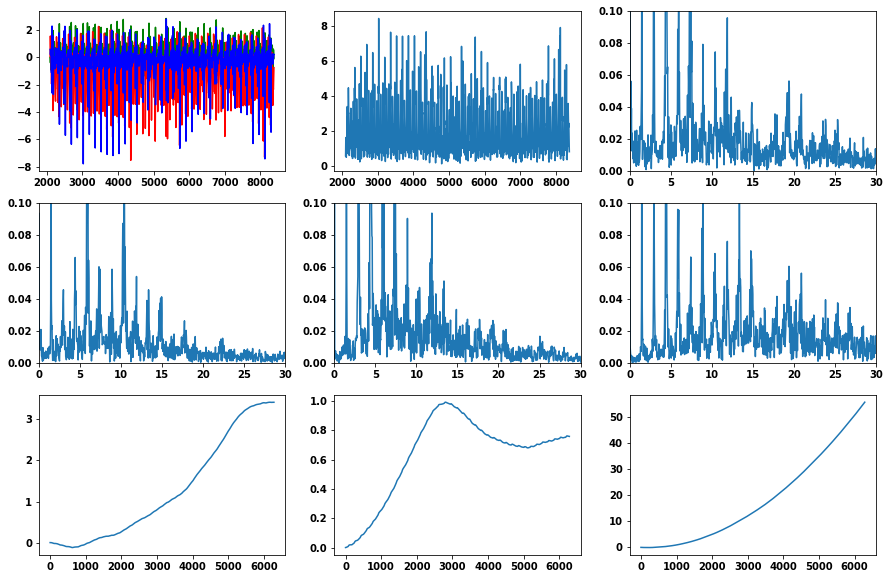

2021-06-2112.12.41бег Амплитуда: 8.29272645412451
2021-06-2112.13.39бег
2021-06-2112.13.39бег
New means: 2.5730983705745997e-17 -2.940683852085257e-17 0.836470625700227


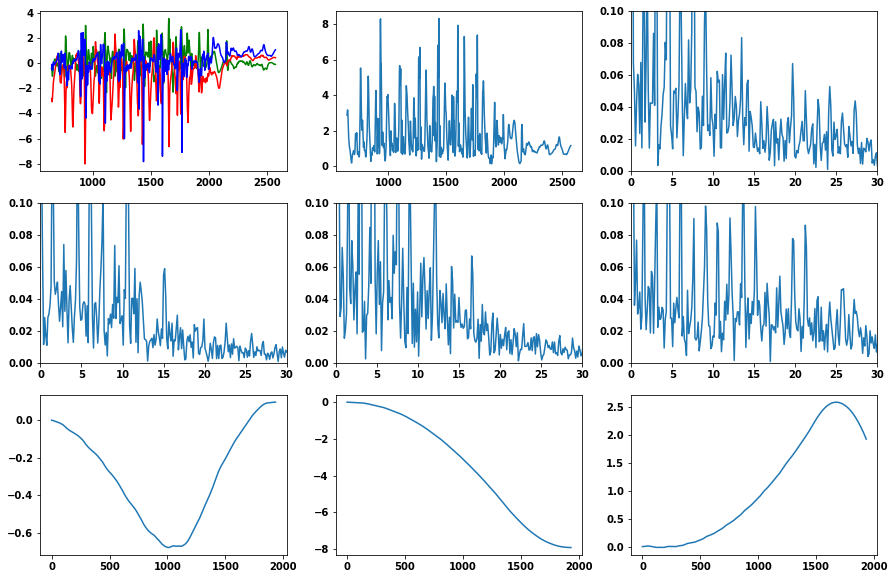

2021-06-2112.13.39бег Амплитуда: 8.191972510427641
2021-06-2112.14.38бег
2021-06-2112.14.38бег
New means: -5.07711851204073e-18 1.015423702408146e-16 0.9001121246601612


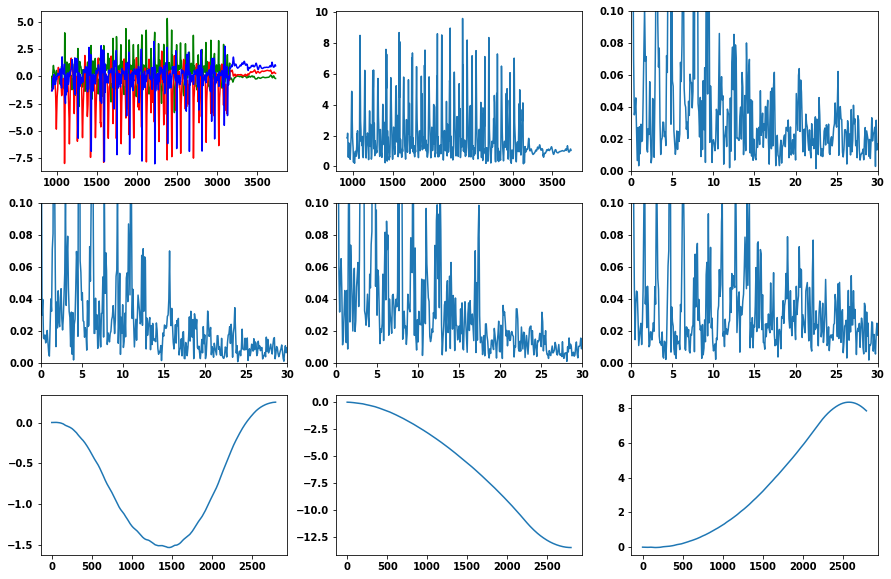

2021-06-2112.14.38бег Амплитуда: 9.436970090271668
2021-06-2112.23.33вел
2021-06-2112.23.33вел
New means: 1.3419126265535415e-17 0.0 0.4359234085061695


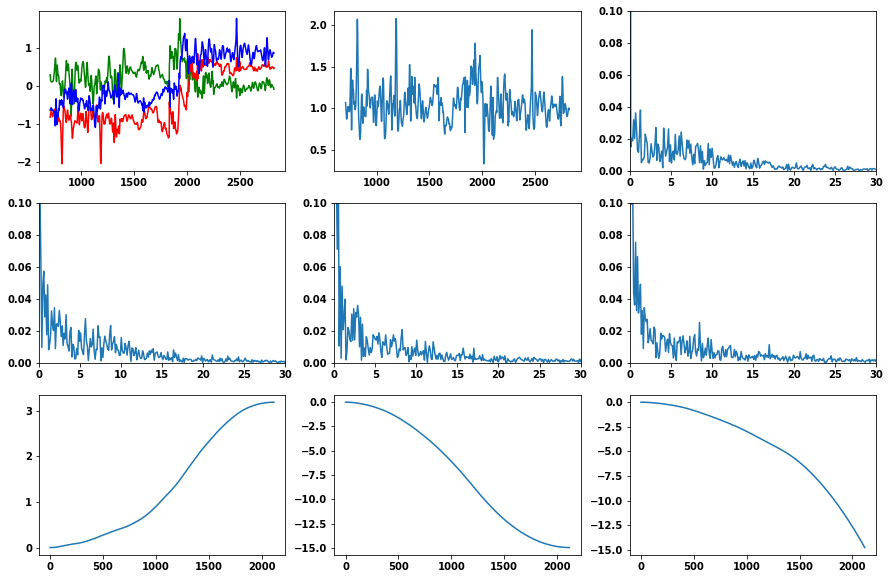

2021-06-2112.23.33вел Амплитуда: 1.7496778171718206
2021-06-2112.26.21вел
2021-06-2112.26.21вел
New means: 1.0648823316000003e-17 8.519058652800002e-17 0.5929677912570428


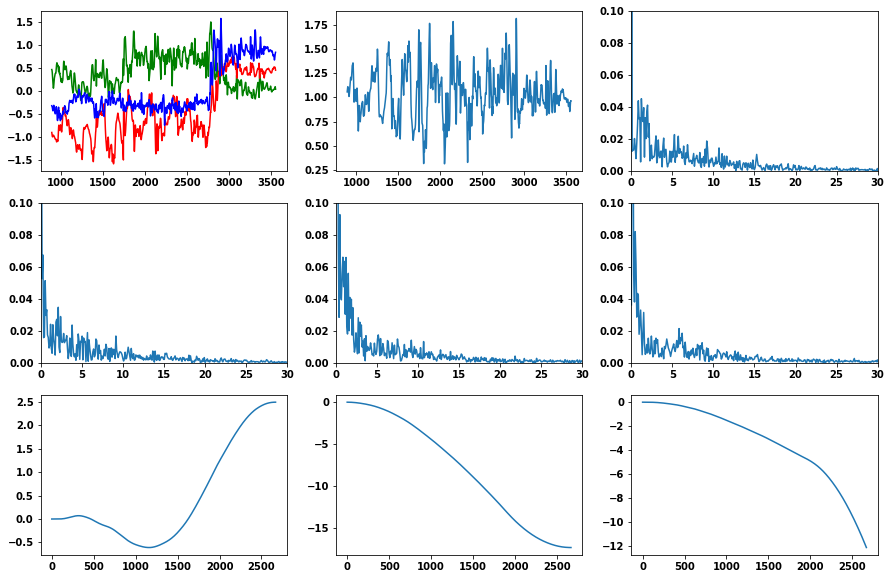

2021-06-2112.26.21вел Амплитуда: 1.5117563691489093
2021-06-2112.33.57вел
2021-06-2112.33.57вел
New means: -8.997771089957739e-17 0.0 0.5722984175818986


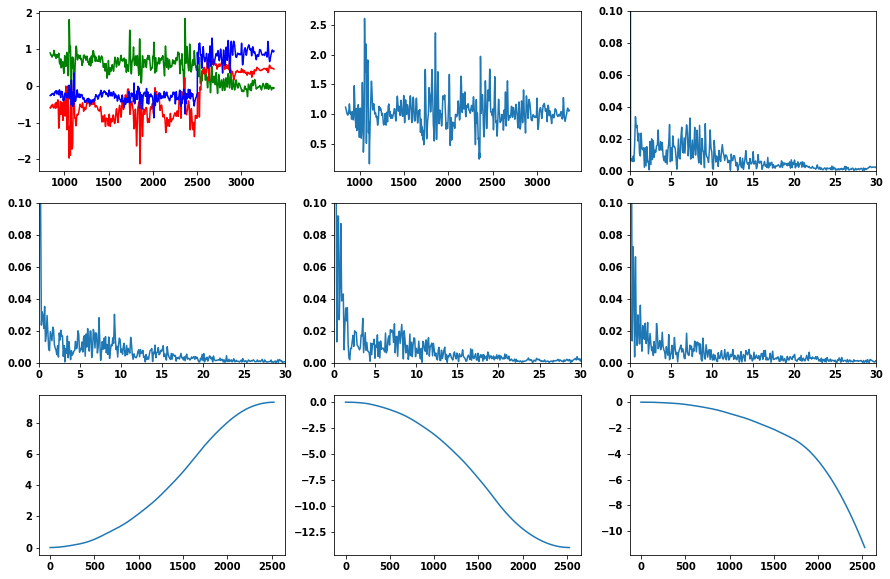

2021-06-2112.33.57вел Амплитуда: 2.4565741360291082
2021-06-2115.05.17лествверх
2021-06-2115.05.17лествверх
New means: 6.465357013285716e-18 9.536401594596431e-17 1.00420459946584


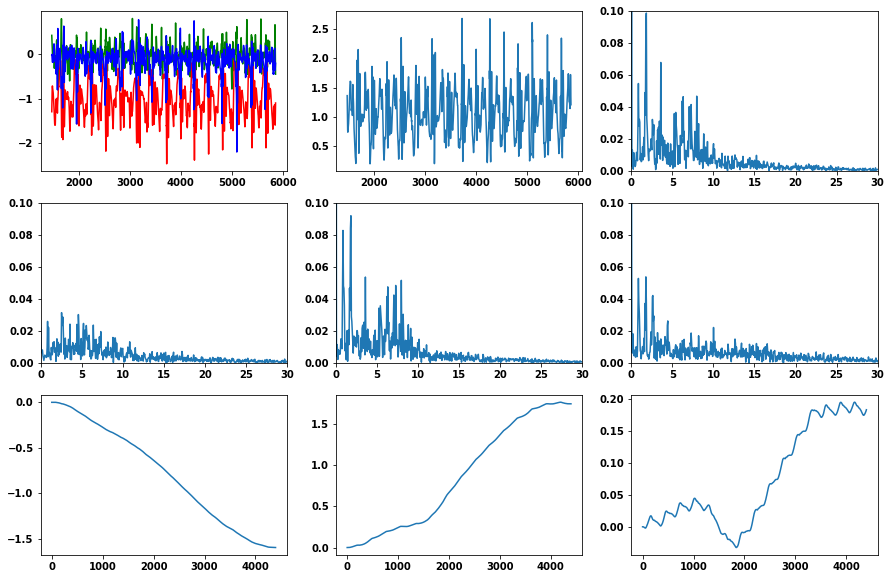

2021-06-2115.05.17лествверх Амплитуда: 2.4797016577768014
2021-06-2115.10.43лествверх
2021-06-2115.10.43лествверх
New means: 0.0 -7.599387548236365e-17 0.6820539970024133


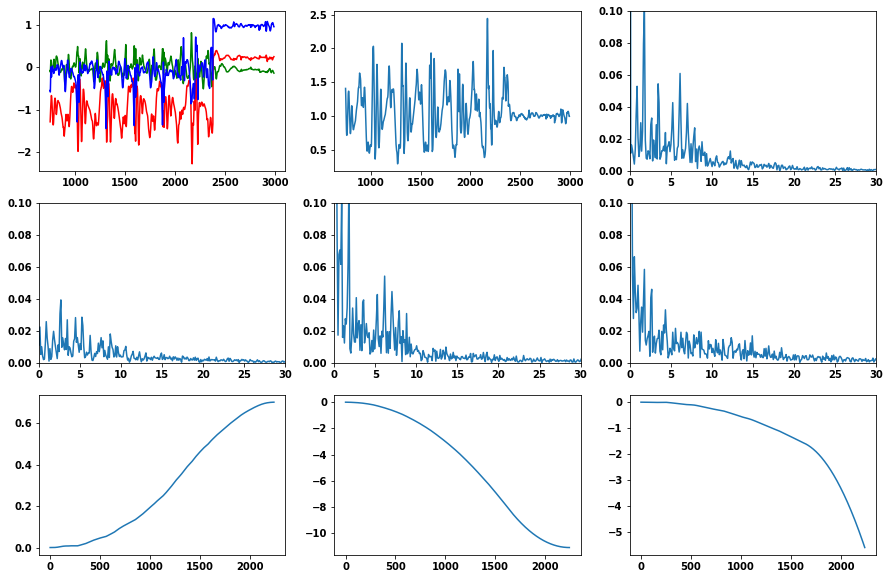

2021-06-2115.10.43лествверх Амплитуда: 2.1528903236206154
2021-06-2115.12.09лествверх
2021-06-2115.12.09лествверх
New means: -4.748823630811029e-18 7.360676627757095e-17 1.017090779707521


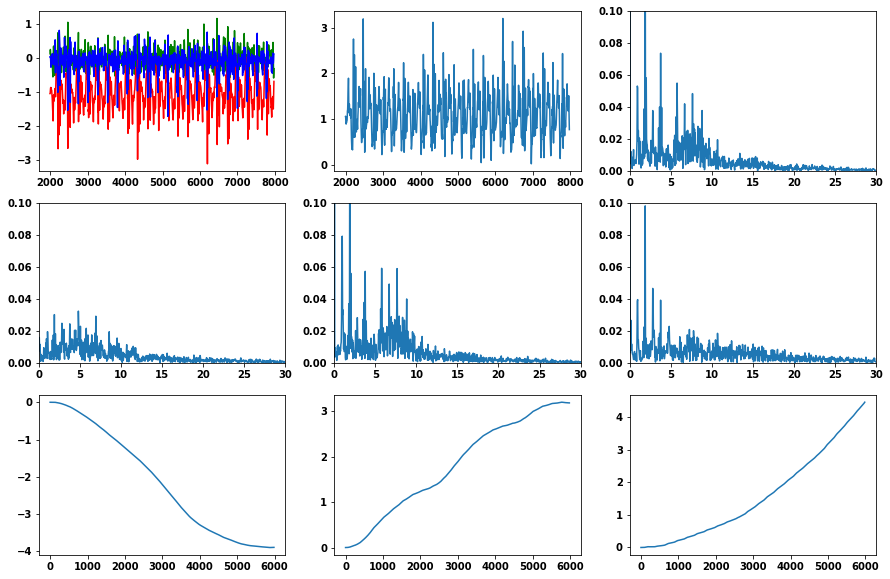

2021-06-2115.12.09лествверх Амплитуда: 3.186694711101894
2021-06-2121.51.56 Аня_ходьба
2021-06-2121.51.56 Аня_ходьба
New means: -3.626605771392625e-18 7.25321154278525e-18 0.9760458513108302


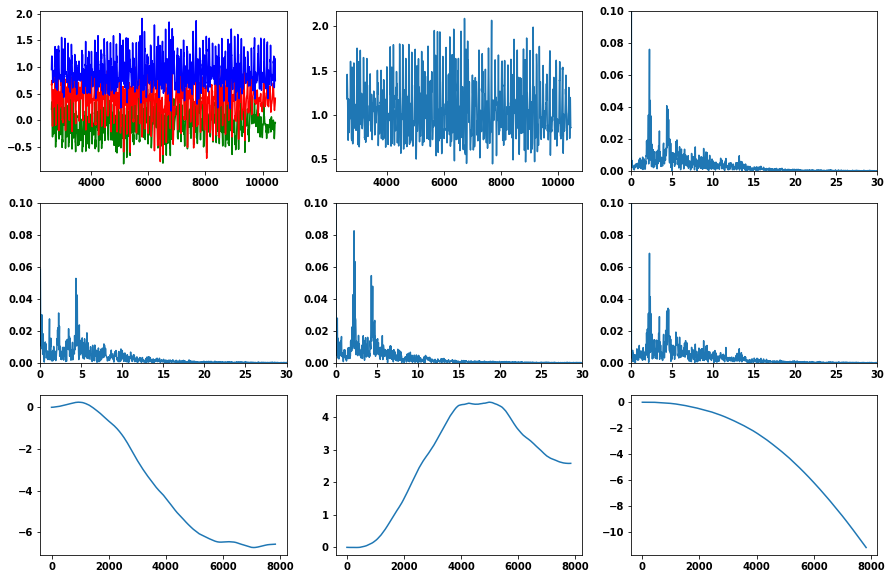

2021-06-2121.51.56 Аня_ходьба Амплитуда: 1.6412115347153107
2021-06-2219.47.51лестнвверх.csv
2021-06-2219.47.51лестнвверх.csv
New means: 1.464432678813067e-17 4.759406206142468e-18 0.9843796826909005


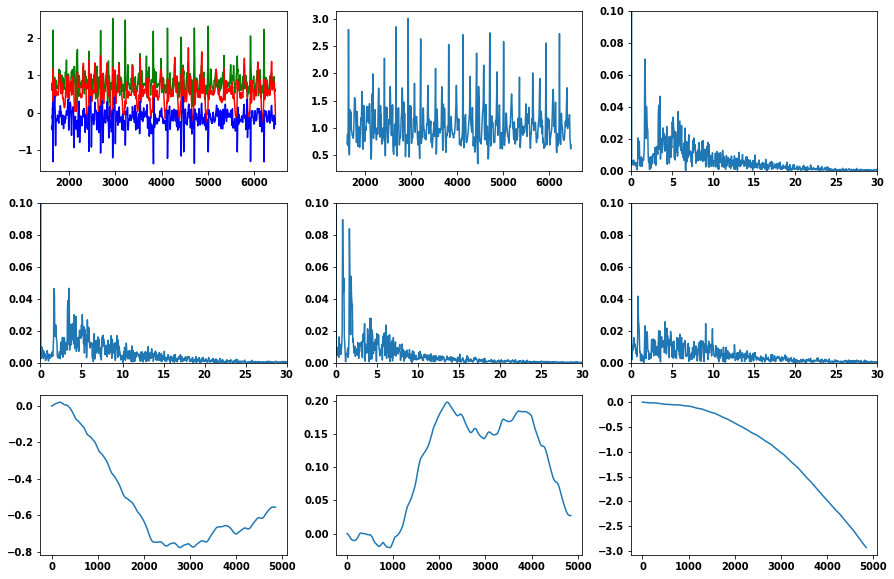

2021-06-2219.47.51лестнвверх.csv Амплитуда: 2.659311807152369
2021-06-2219.48.53лестнвверх.csv
2021-06-2219.48.53лестнвверх.csv
New means: nan nan nan


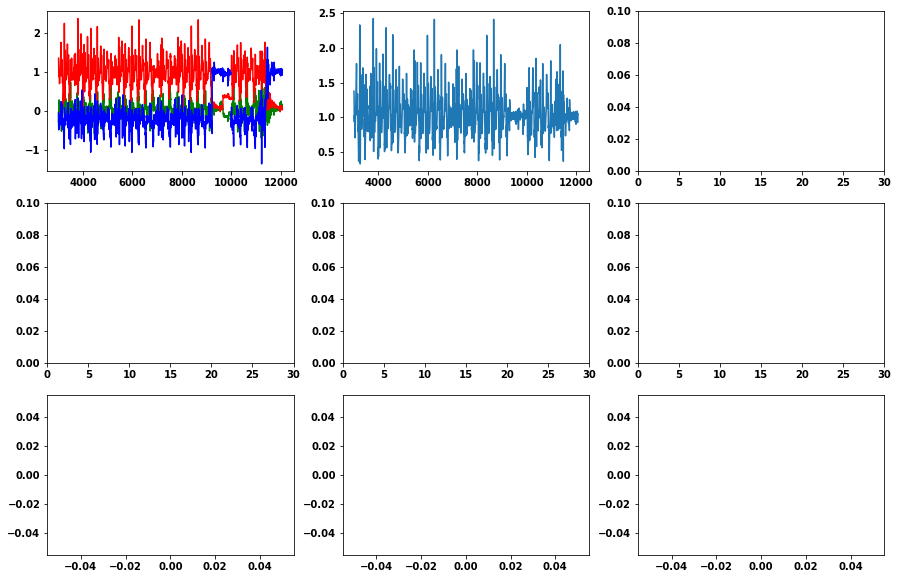

2021-06-2219.48.53лестнвверх.csv Амплитуда: 2.090851583280702
2021-06-2219.49.53лестнвверх.csv
2021-06-2219.49.53лестнвверх.csv
New means: -8.369425156944701e-17 1.2232236767842256e-16 0.962879401874996


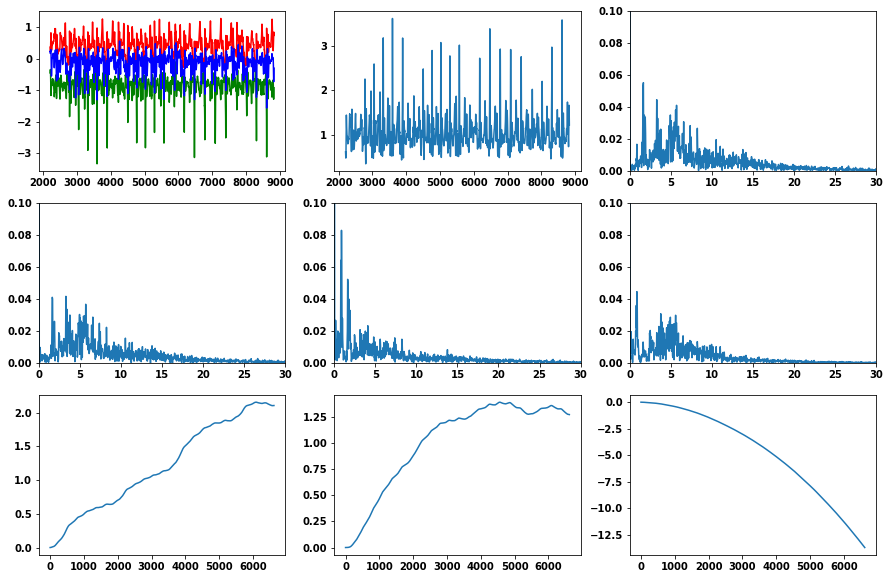

2021-06-2219.49.53лестнвверх.csv Амплитуда: 3.29669925258247
2021-06-2411.55.01лествв
2021-06-2411.55.01лествв
New means: 1.648938838261836e-16 -2.9980706150215195e-17 0.7033806028660737


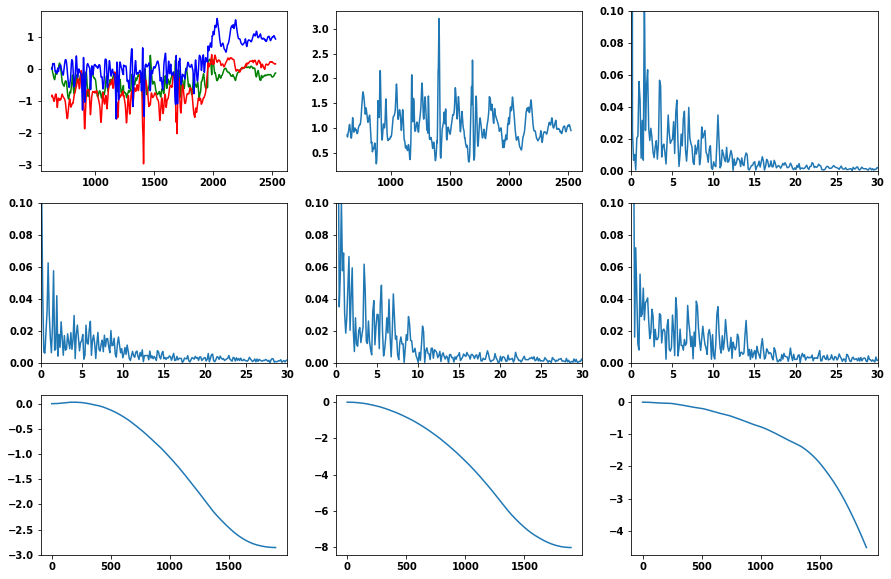

2021-06-2411.55.01лествв Амплитуда: 2.9327244160892145
2021-06-2413.27.53лест вв
2021-06-2413.27.53лест вв
New means: -2.944644574223374e-17 0.0 0.5933737817734297


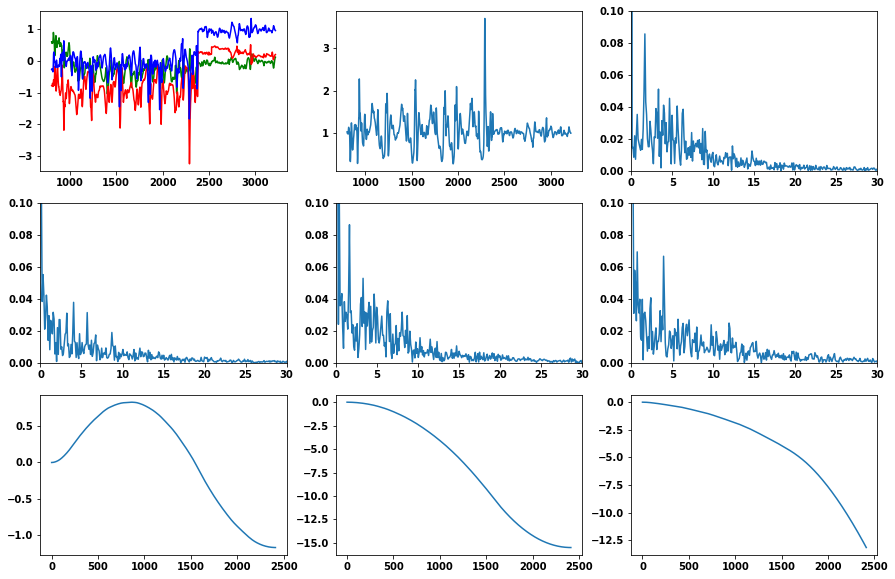

2021-06-2413.27.53лест вв Амплитуда: 3.444873428785556
2021-06-2413.29.07лества
2021-06-2413.29.07лества
New means: -2.4512039181029762e-17 0.0 0.5786380852703017


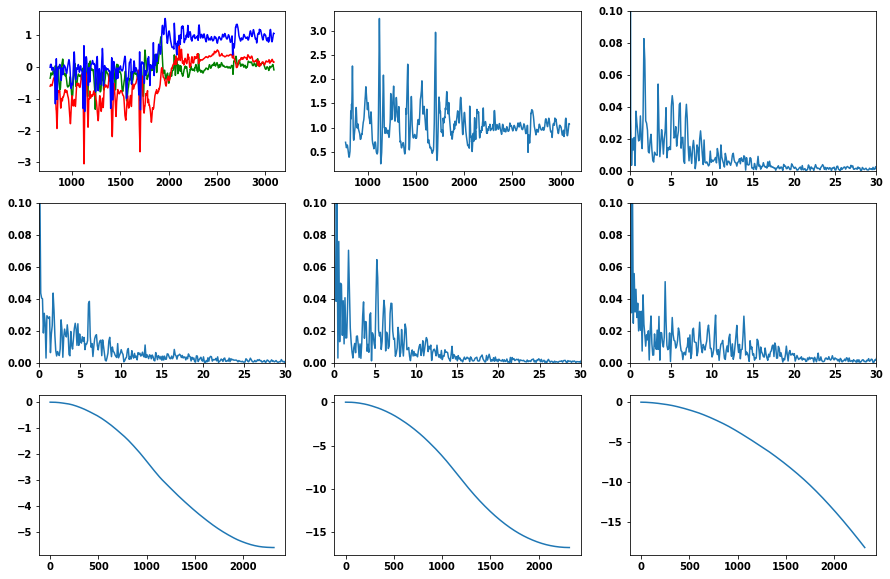

2021-06-2413.29.07лества Амплитуда: 2.994809715812
бег.csv
бег.csv
New means: -2.6731274544898074e-17 -9.165008415393624e-17 0.9884903814402519


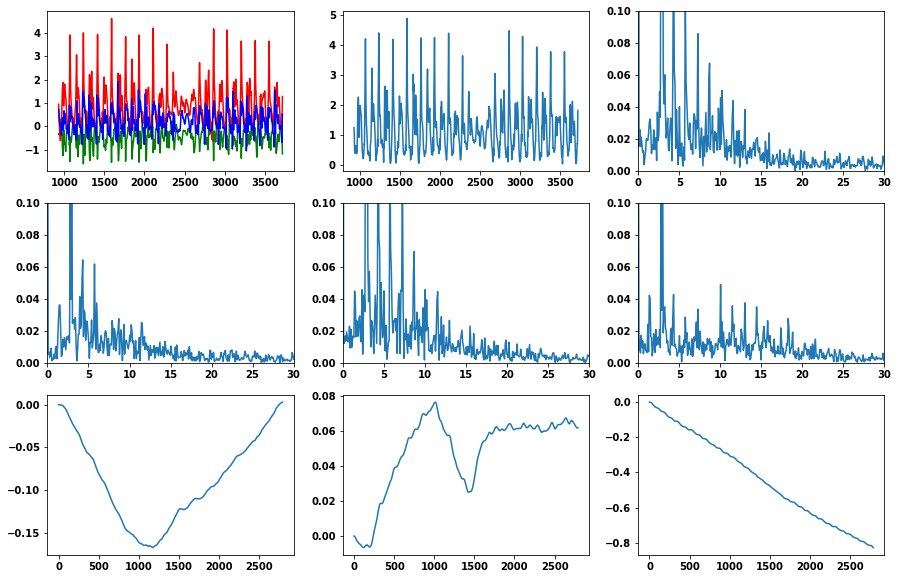

бег.csv Амплитуда: 4.850398426810173
стояние.csv
стояние.csv
New means: -3.7253201804968555e-18 -2.4835467869979033e-18 1.0185915295149348


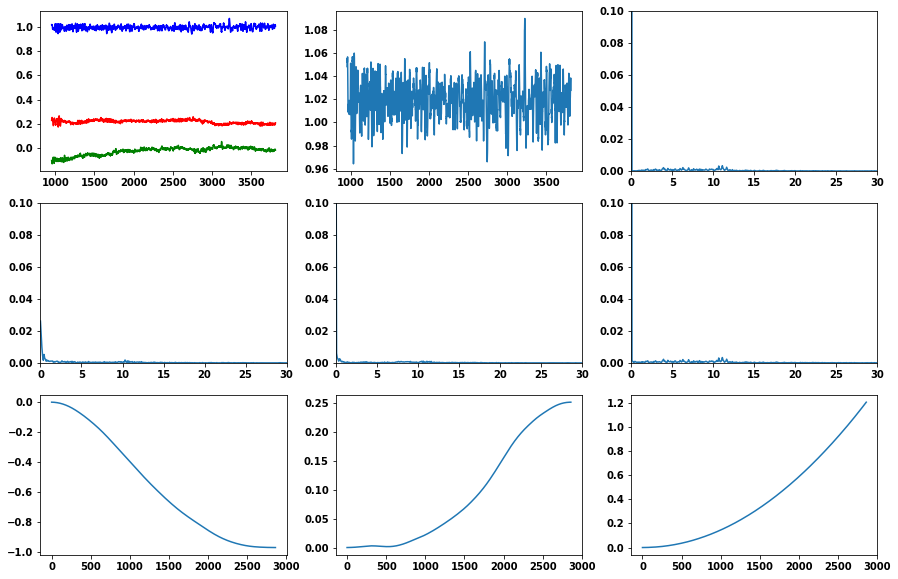

стояние.csv Амплитуда: 0.12526810494170038
ходьба1.csv
ходьба1.csv
New means: -3.027880976250427e-17 2.803593496528173e-17 1.0127008060134766


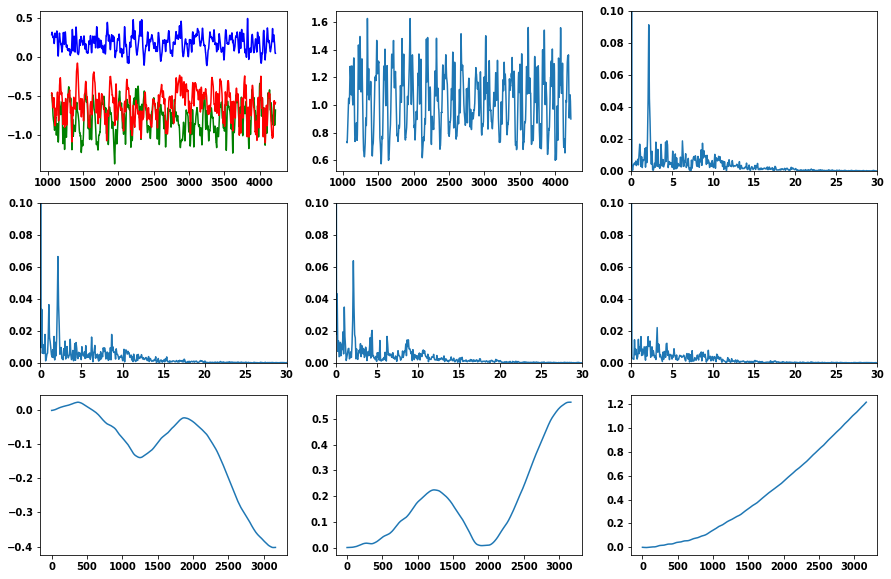

ходьба1.csv Амплитуда: 1.05191756371482
ходьба2.csv
ходьба2.csv
New means: -1.2012040518580491e-16 -1.995220289526929e-16 0.9966502218363913


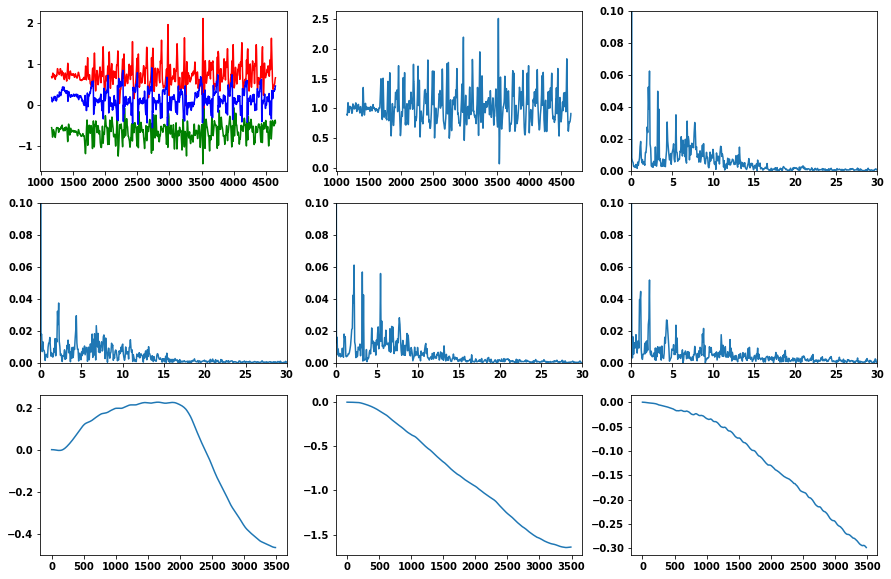

ходьба2.csv Амплитуда: 2.4503306265340634
Рома_ходьба.csv
Рома_ходьба.csv
New means: 9.62681604764509e-18 -1.7788681827170274e-17 1.0211550758548786


Рома_ходьба.csv Амплитуда: 3.715914049964011


In [9]:
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

def process_data(df, comma=True, cut=True, name = "", a=-1, b=-1):
    
    print(name)
    
    if a == -1:
        st = int(0.2*len(df))
    else:
        st = a
            
    if b == -1:
        end = -int(0.2*len(df))
    else:
        end = b
        
    if cut == False:
        st = 0
        end = -1

    print(name)
    fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
    
    if comma is True:
        df = df.applymap(lambda x: str(x).replace(',','.'))
        df['gFx'] = df['gFx'].astype(float)
        df['gFy'] = df['gFy'].astype(float)
        df['gFz'] = df['gFz'].astype(float)
    if cut:
        ax1.plot(df.iloc[st:end]['gFx'],c='g')
        ax1.plot(df.iloc[st:end]['gFy'],c='r')
        ax1.plot(df.iloc[st:end]['gFz'],c='b')
    else:
        ax1.plot(df['gFx'],c='g')
        ax1.plot(df['gFy'],c='r')
        ax1.plot(df['gFz'],c='b')
#        show()
########################################################################        
#integration

#вычисляем средний вектор ускорения по треку

    mx = df.iloc[st:end]['gFx'].values.mean() 
    my = df.iloc[st:end]['gFy'].values.mean() 
    mz = df.iloc[st:end]['gFz'].values.mean() 
    
#находим матрицу поворота этого вектора к вектору (0,0,1)

    Vec = [mx,my,mz]
    Point = [0, 0, 1]
    mat = rotation_matrix_from_vectors(Vec, Point)
    
#каждую точку трека поворачиваем на эту матрицу

    new_x, new_y, new_z = rotate(df.iloc[st:end]['gFx'].values, df.iloc[st:end]['gFy'].values, df.iloc[st:end]['gFz'].values, mat)

#проверяем, что новые средние равны примерно (0,0,1). Если это не так, значит, телефон часто поворачивался при движении, и нам не поможет это преобразование

    print('New means:', mean(new_x), mean(new_y), mean(new_z))

#делим на 250*250 (это нужно было еще при интегрировании)
    new_x = [elem for elem in new_x]
    new_y = [elem for elem in new_y]
#из ускорения по z вычитаем 1 (g), чтобы убрать влияние силы тяжести и оставить только ускорение по z
    new_z = [elem-1 for elem in new_z]
    
#предположим, что на всех устройствах частота сбора данных 250 Hz
    dt = 1./250
              
#дважды интегрируем ускорение, чтобы получить перемещение вдоль каждой оси
    int_x = integrate(integrate(new_x, dt), dt)
    ax7.plot(int_x)
    
    int_y = integrate(integrate(new_y, dt), dt)
    ax8.plot(int_y)
    
    int_z = integrate(integrate(new_z, dt), dt)
    ax9.plot(int_z)

########################################################################        
#преобразование Фурье
########################################################################        

    Fs = 250 #частота сбора данных
    y = df.iloc[st:end]['gFx'].values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
    
    Min = 0
    
    ax4.plot(frq,yabs) # plotting the spectrum
    ax4.set_xlim([0,30]) #очень большие частоты нам не нужны
    ax4.set_ylim([Min,0.1]) #не смотрим на близкие к нулю величины частот

    
    y = df.iloc[st:end]['gFy'].values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
    
    ax5.plot(frq,yabs) # plotting the spectrum
    ax5.set_xlim([0,30])
    ax5.set_ylim([Min,0.1])


    y = df.iloc[st:end]['gFz'].values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
   
    ax6.plot(frq,yabs) # plotting the spectrum
    ax6.set_xlim([0,30])
    ax6.set_ylim([Min,0.1])


    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5

    y = Acc.values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
    
    ax3.plot(frq,yabs) # plotting the spectrum
    ax3.set_xlim([0,30])
    ax3.set_ylim([Min,0.1])
########################################################################        
    
    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5
    ax2.plot(Acc)
    plt.show()
    
    print(name + ' Амплитуда:', Acc.max()-Acc.min())
    
    return df

for df, target in zip(Data,Target):
    process_data(df, name=target)

### Важные комментарии

1. В ноутбуке реализовано преобразование Фурье. Для различения типов движения вам необходимо выделить числовые признаки из графика частот (взять одну/две/три... наибольших частоты: их x и y координаты как признаки, выделить другие признаки из графика частот).


2. В ноутбуке дана идея приведения данных к неподвижным осям, а затем интегрирования для получения перемещения. Из графиков видно, что не всегда эта идея дает нам корректные перемещения. Это происходит, так как не всегда телефон неподвижен, поэтому в случаях, когда телефон сильно колеблется, приведение к неподвижным осям не сработает (не выявим верные неподвижные оси). Также для интегрирования использован простейший метод численного вычисления (метод прямоугольников), небольшие неточности которого могут давать значительную ошибку при двойном интегрировании. Поэтому данную идею необходимо доработать, чтобы использовать её для решения задачи.


3. Существуют и другие интересные подходы, помогающие решить задачу, над которыми вам предлагается подумать самостоятельно.